In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
import io 
%cd "data"
malldf=pd.read_csv("Mall_Customers.csv")

C:\Users\vraja\1.Python2\Imarticus\Rajesh_P\MyPrograms\data


In [3]:
malldf.info()
# No Null Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [4]:
malldf.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
malldf=malldf.drop('CustomerID',axis=1)

In [6]:
malldf=pd.get_dummies(malldf,columns=['Gender'])

In [7]:
malldf.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False


In [8]:
h_clust=AgglomerativeClustering(n_clusters=5,metric="euclidean",linkage="ward")

In [9]:
h_clust_model=h_clust.fit(malldf)

In [10]:
pd.DataFrame(h_clust_model.labels_).value_counts()

0
0    126
3     36
4     36
1     26
2     26
Name: count, dtype: int64

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [12]:
X_euclidean=euclidean_distances(malldf)

C:\Users\vraja\AppData\Local\Temp\ipykernel_20072\87384836.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram=sch.dendrogram(sch.linkage(X_euclidean,method="ward"))


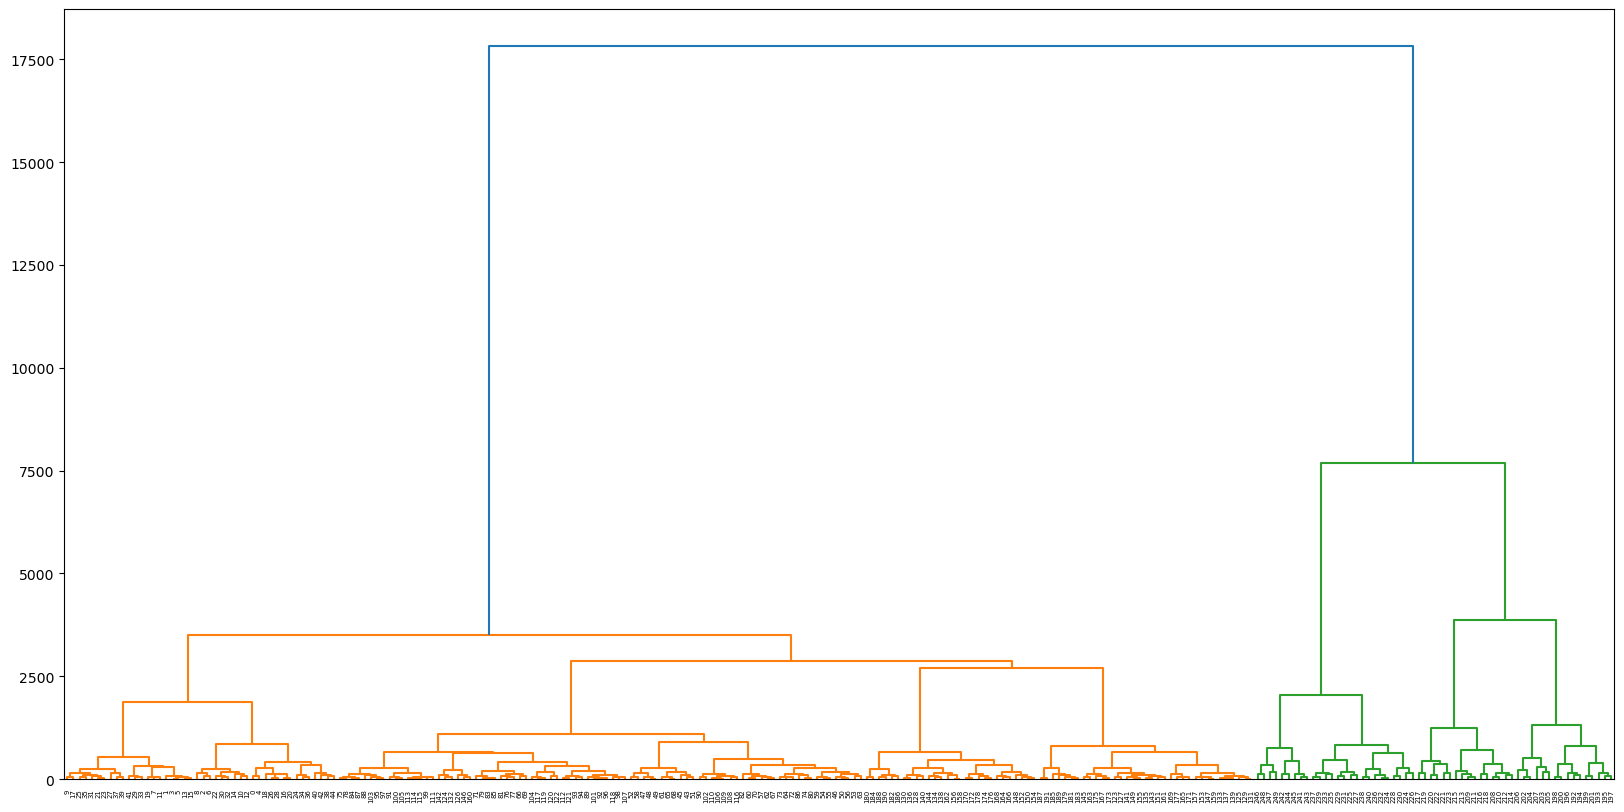

In [13]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X_euclidean,method="ward"))

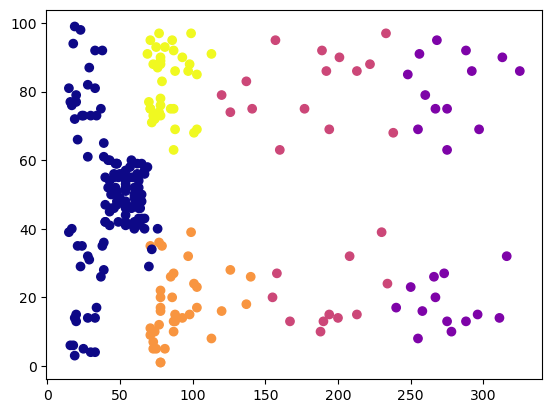

In [14]:
plt.scatter(malldf["Annual Income (k$)"],malldf["Spending Score (1-100)"],
            c=h_clust_model.labels_,cmap="plasma")

# There are no overlappings so 5 is the right cluster count

In [15]:
# find epsilon

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
neighbors=NearestNeighbors(n_neighbors=5)

In [18]:
nbrs=neighbors.fit(malldf)

In [19]:
distances,indices=nbrs.kneighbors(malldf)

In [20]:
distances=np.sort(distances[:,1])

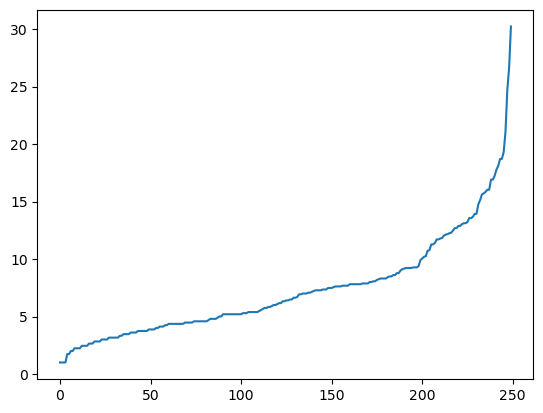

In [21]:
plt.plot(distances)

In [22]:
# Epsilon - 14. point at which distance is stagnating
# MinPoints - 5

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbs=DBSCAN(eps=14,min_samples=5).fit(malldf)

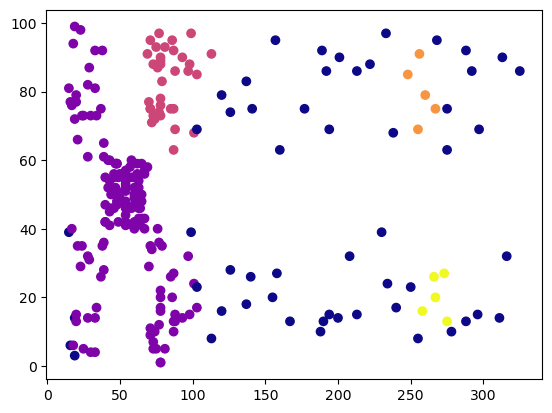

In [25]:
plt.scatter(malldf["Annual Income (k$)"],malldf["Spending Score (1-100)"],
            c=dbs.labels_,cmap="plasma")

# There are no overlapping so 5 is the right cluster count
# Noise points are placed away from the clusters